In [9]:
import pandas as pd

df = pd.read_csv (r'C:\Users\pc\Downloads\titanic-passengers.csv', sep = ';')
print (df)

     PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    ...   
88

In [2]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [19]:
df["Cabin"] = df["Cabin"].fillna("C23 C25 C27")

print(df["Cabin"].value_counts())


C23 C25 C27    691
G6               4
B96 B98          4
E101             3
F2               3
              ... 
D46              1
A6               1
A10              1
B102             1
C103             1
Name: Cabin, Length: 147, dtype: int64


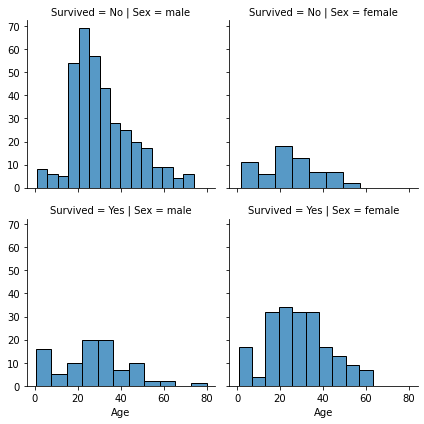

In [18]:
import seaborn as sns

test = sns.FacetGrid(df, col = "Sex", row = "Survived")
test.map(sns.histplot, "Age")

In [4]:
replacement_dict = {"Survived": {"Yes":1 ,"No":0}}
df.replace(replacement_dict, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    

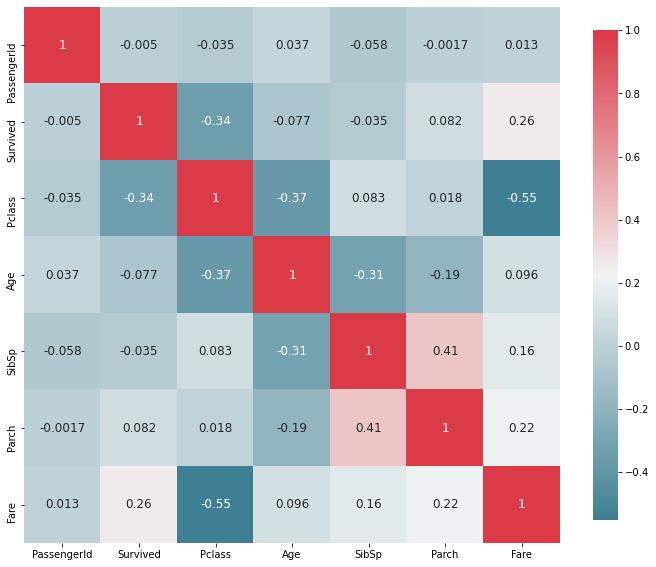

In [7]:
import matplotlib.pyplot as plt
plot_correlation_map(df)

In [ ]:
It shows the correlation of the values in +ve and -ve, and it shows that when the number is lower it means that the person survived
but if the number is high then the person didn't survive, it also show the who is in the plass
through the fare if the number is high that means the person was in the first class

In [8]:
df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [27]:
nameless_df = df.drop('Name',axis=1)

In [3]:
"Collander, Mr. Erik Gustaf".split()[1]

'Mr.'

In [7]:
def Title(function_input_1):
    #do some stuff
    return function_input_1.split()[1]

Title("Collander, Mr. Erik Gustaf")

'Mr.'

In [10]:
df["Name"].map(Title)

0        Mr.
1        Mr.
2        Mr.
3       Mrs.
4        Mr.
       ...  
886     Mrs.
887      Mr.
888    Miss.
889      Mr.
890    Miss.
Name: Name, Length: 891, dtype: object

In [24]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master",

                    }
title_replacement_dict = {"Title":Title_Dictionary}
df.replace(title_replacement_dict, inplace=True)

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


DataError: No numeric types to aggregate

In [13]:
print(df['FamilySize'])

0      1
1      1
2      1
3      5
4      2
      ..
886    2
887    1
888    1
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64
